# Glove Vectors Example

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy import spatial

# create a dictionary to hold pre-trained vectors
embeddings_dict = {}

# open file
with open("./data/glove.6B.50d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

print(embeddings_dict['king'])

[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]


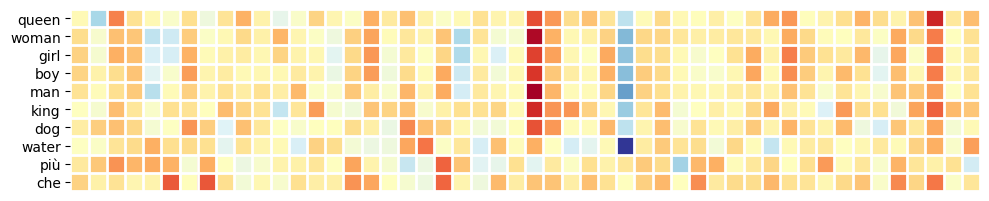

In [11]:
def plotEmbeddingsVector(wordList):
    embeddingList = []

    for w in wordList:
        embeddingList.append(embeddings_dict[w])

    data = np.array(embeddingList)

    matplotlib.rc('figure', figsize=(10, 5))

    # Heat map
    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap="RdYlBu")

    ax.set_xticks([]) 
    ax.set_yticks(np.arange(len(wordList)), labels=wordList)

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", bottom=False, left=False)

    fig.tight_layout()
    plt.show()

exampleList = ['queen', 'woman', 'girl', 'boy', 'man', 'king', 'dog', 'water', 'più', 'che']
plotEmbeddingsVector(exampleList)

['man', 'woman', 'another', 'boy', 'one', 'old', 'turned', 'whose', 'himself', 'who']


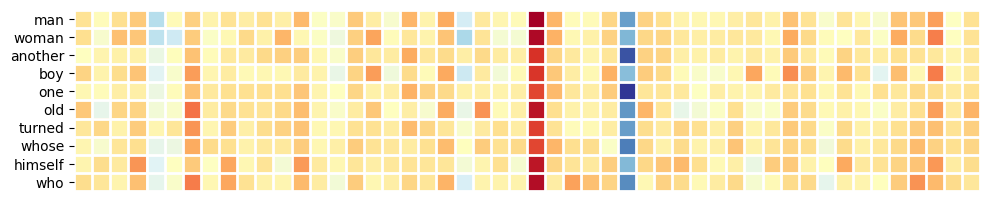

In [16]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))


embeddingsWords = find_closest_embeddings(embeddings_dict["man"])[0:10]
print(embeddingsWords)
plotEmbeddingsVector(embeddingsWords)

In [8]:
print(find_closest_embeddings(embeddings_dict["twig"] - embeddings_dict["branch"] + embeddings_dict["hand"])[:5])

['fingernails', 'toenails', 'stringy', 'peeling', 'shove']
